In [ ]:
import pandas as pd
import numpy as np

np.random.seed(0)
t = np.arange(120)
data = 20 + 0.05 * t + 10 * np.sin(2 * np.pi * t / 12) + np.random.normal(size=120)
serie_temporal = pd.Series(data, index=pd.date_range(start='2010-01-01', periods=120, freq='M'))

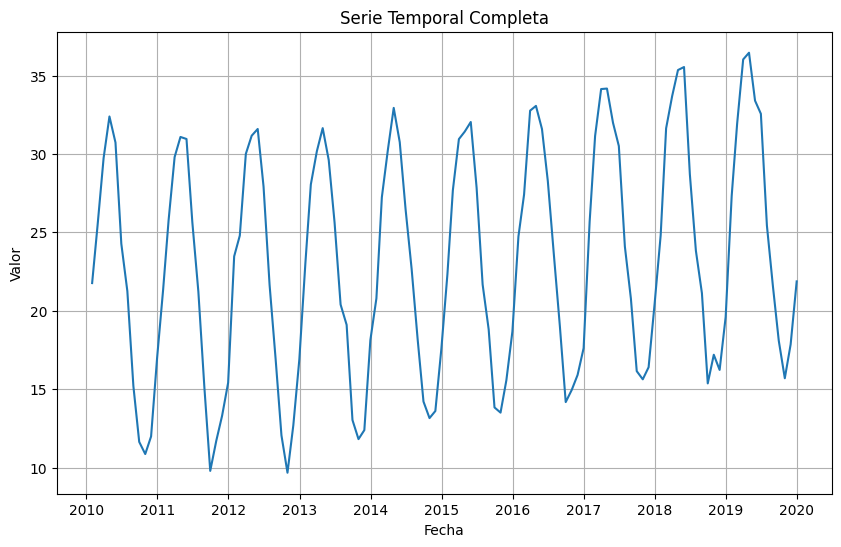

In [ ]:
import matplotlib.pyplot as plt

# Graficar la serie temporal completa
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal)
plt.title('Serie Temporal Completa')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


### The graph generates a lot of noise in the graph since it does not present any seasonality or any trend.

In [ ]:
serie_temporal

2010-01-31    21.764052
2010-02-28    25.450157
2010-03-31    29.738992
2010-04-30    32.390893
2010-05-31    30.727812
                ...    
2019-08-31    21.552456
2019-09-30    18.086998
2019-10-31    15.694990
2019-11-30    17.853825
2019-12-31    21.872207
Freq: M, Length: 120, dtype: float64

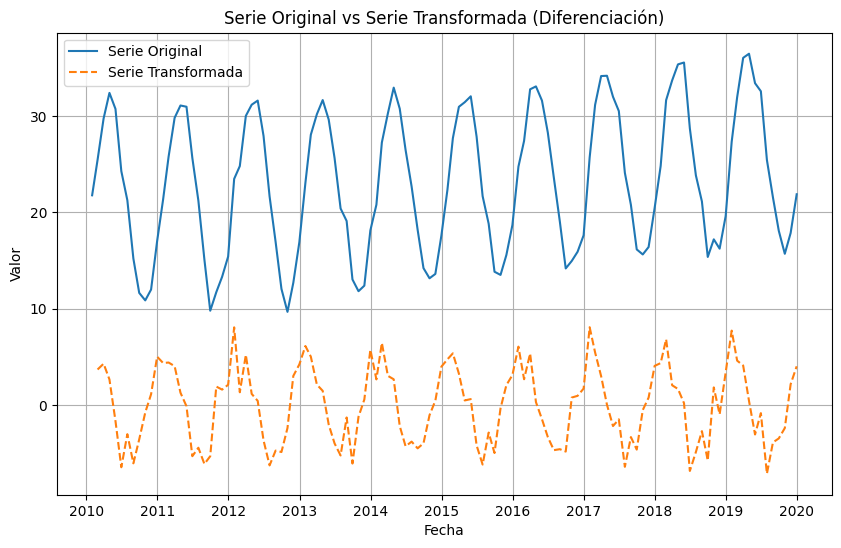

In [ ]:
# Aplicar la transformación de diferenciación
serie_transformada = serie_temporal.diff().dropna()

# Graficar la serie original y la serie transformada
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal, label='Serie Original')
plt.plot(serie_transformada, label='Serie Transformada', linestyle='--')
plt.title('Serie Original vs Serie Transformada (Diferenciación)')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Función para realizar la prueba de Dickey-Fuller aumentada (ADF)
def prueba_adf(serie, nombre):
    resultado = adfuller(serie)
    print(f'Prueba de Dickey-Fuller Aumentada para {nombre}:')
    print('Estadística de la Prueba:', resultado[0])
    print('Valor p:', resultado[1])
    print('Valores críticos:')
    for clave, valor in resultado[4].items():
        print(f'   {clave}: {valor}')
    if resultado[1] <= 0.05:
        print("Conclusion: La serie es estacionaria")
    else:
        print("Conclusion: La serie no es estacionaria")

# Realizar la prueba de Dickey-Fuller aumentada (ADF) en la serie original
prueba_adf(serie_temporal, 'Serie Original')

# Realizar la prueba de Dickey-Fuller aumentada (ADF) en la serie transformada
prueba_adf(serie_transformada, 'Serie Transformada')


Prueba de Dickey-Fuller Aumentada para Serie Original:
Estadística de la Prueba: 2.0631554293063212
Valor p: 0.9987496009552816
Valores críticos:
   1%: -3.4936021509366793
   5%: -2.8892174239808703
   10%: -2.58153320754717
Conclusion: La serie no es estacionaria
Prueba de Dickey-Fuller Aumentada para Serie Transformada:
Estadística de la Prueba: -7.8683823002055675
Valor p: 5.062168776405132e-12
Valores críticos:
   1%: -3.4936021509366793
   5%: -2.8892174239808703
   10%: -2.58153320754717
Conclusion: La serie es estacionaria


### Given the results of the algorithm, it can be deduced that the original series is not stationary and the transformed series is stationary.